# Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


confirmed_df_Peru = confirmed_df.loc[confirmed_df['Country/Region']=='Peru']
deaths_df_Peru = deaths_df.loc[confirmed_df['Country/Region']=='Peru']
recoveries_df_Peru = recoveries_df.loc[confirmed_df['Country/Region']=='Peru']

In [3]:
confirmed_df_Peru.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
82,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,...,11,11,15,28,38,43,86,117,145,234


In [4]:
deaths_df_Peru.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
82,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
recoveries_df_Peru.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
82,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [6]:
cols = confirmed_df.keys()

cols_Peru = confirmed_df_Peru.keys()
print(cols_Peru)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20'],
      dtype='object')


all over the world

In [7]:
#confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
#deaths = deaths_df.loc[:, cols[4]:cols[-1]]
#recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In Peru

In [8]:
confirmed_Peru = confirmed_df_Peru.loc[:, cols_Peru[48]:cols_Peru[-1]]
deaths_Peru = deaths_df_Peru.loc[:, cols_Peru[48]:cols_Peru[-1]]
recoveries_Peru = recoveries_df_Peru.loc[:, cols_Peru[48]:cols_Peru[-1]]

In [9]:
#dates = confirmed.keys()
dates = confirmed_Peru.keys()

#world_cases = []
#total_deaths = [] 
#mortality_rate = []
#total_recovered = [] 

Peru_cases = []
Peru_total_deaths = [] 
Peru_mortality_rate = []
Peru_total_recovered = []

for i in dates:
#    confirmed_sum = confirmed[i].sum()
    Peru_confirmed_sum = confirmed_Peru[i].sum()
    
#    death_sum = deaths[i].sum()
    Peru_death_sum = deaths_Peru[i].sum()
    
#    recovered_sum = recoveries[i].sum()
    Peru_recovered_sum = recoveries_Peru[i].sum()
    
#    world_cases.append(confirmed_sum)
    Peru_cases.append(Peru_confirmed_sum)
    
#    total_deaths.append(death_sum)
    Peru_total_deaths.append(Peru_death_sum)
    
#    mortality_rate.append(death_sum/confirmed_sum)
    Peru_mortality_rate.append(Peru_death_sum/Peru_confirmed_sum)
    
#    total_recovered.append(recovered_sum)
    Peru_total_recovered.append(Peru_recovered_sum)

In [10]:
days_since_3_06 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
#world_cases = np.array(world_cases).reshape(-1, 1)
#total_deaths = np.array(total_deaths).reshape(-1, 1)
#total_recovered = np.array(total_recovered).reshape(-1, 1)

Peru_cases = np.array(Peru_cases).reshape(-1, 1)
Peru_total_deaths = np.array(Peru_total_deaths).reshape(-1, 1)
Peru_total_recovered = np.array(Peru_total_recovered).reshape(-1, 1)

Future Forescating ( 5 days)

In [11]:
days_in_future = 5
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-5]

Convert integer into datetime for better visualization

In [12]:
start = '3/06/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

Train / test Split ( 85%, 15%= 0.15)

In [13]:
#X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

X_Peru_train_confirmed, X_Peru_test_confirmed, y_Peru_train_confirmed, y_Peru_test_confirmed = train_test_split(days_since_3_06, Peru_cases, test_size=0.15, shuffle=False)

Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example.

SVM Model with Peru

In [14]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_Peru_train_confirmed, np.ravel(y_Peru_train_confirmed))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [15]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.01, 'C': 1}

In [16]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 40.811710339001934
MSE: 2373.249018483313


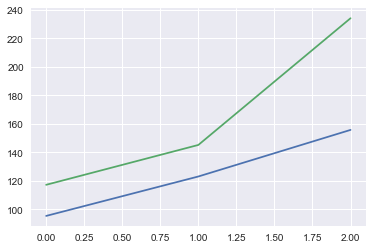

In [17]:
# check against testing data
svm_Peru_test_pred = svm_confirmed.predict(X_Peru_test_confirmed)
plt.plot(svm_Peru_test_pred)
plt.plot(y_Peru_test_confirmed)
print('MAE:', mean_absolute_error(svm_Peru_test_pred, y_Peru_test_confirmed))
print('MSE:',mean_squared_error(svm_Peru_test_pred, y_Peru_test_confirmed))

Linear Reggresion

In [18]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_Peru_train_confirmed, y_Peru_train_confirmed)
test_linear_pred = linear_model.predict(X_Peru_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_Peru_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_Peru_test_confirmed))


MAE: 96.10606060606061
MSE: 11233.179752066115


In [19]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[6.68181818]]
[-10.95454545]


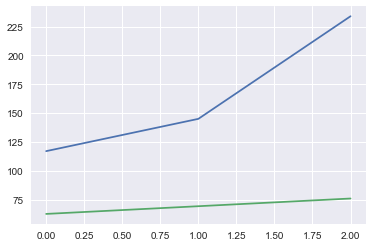

In [20]:
plt.plot(y_Peru_test_confirmed)
plt.plot(test_linear_pred)

Bayesin regresionModel

In [21]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_Peru_train_confirmed, np.ravel(y_Peru_train_confirmed))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [22]:
bayesian_search.best_params_

{'tol': 0.01,
 'lambda_2': 0.0001,
 'lambda_1': 0.0001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-05}

In [23]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_Peru_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_Peru_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_Peru_test_confirmed))

MAE: 97.60128835175992
MSE: 11537.604864578047


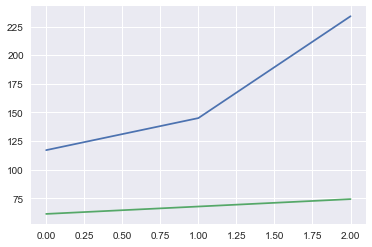

In [24]:
plt.plot(y_Peru_test_confirmed)
plt.plot(test_bayesian_pred)

# Peru Cases Coronovirus CoViD-19 over time

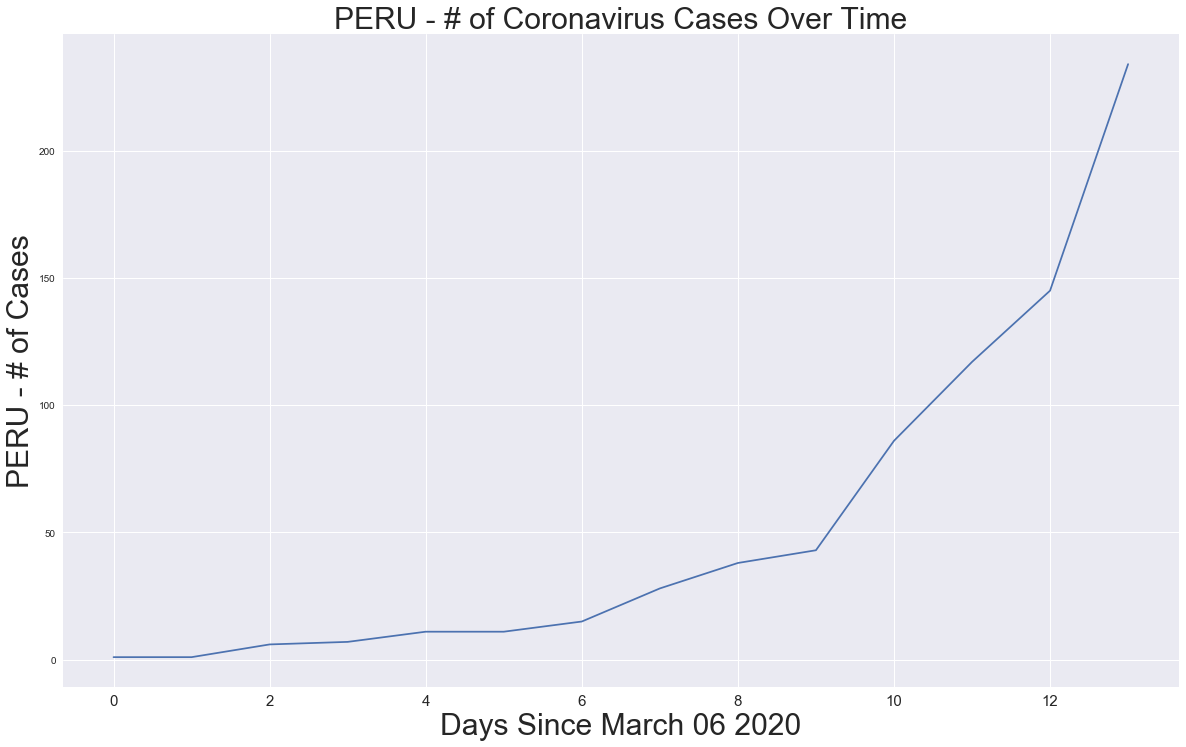

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.title('PERU - # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since March 06 2020', size=30)
plt.ylabel('PERU - # of Cases', size=30)
plt.xticks(size=15)
plt.show()

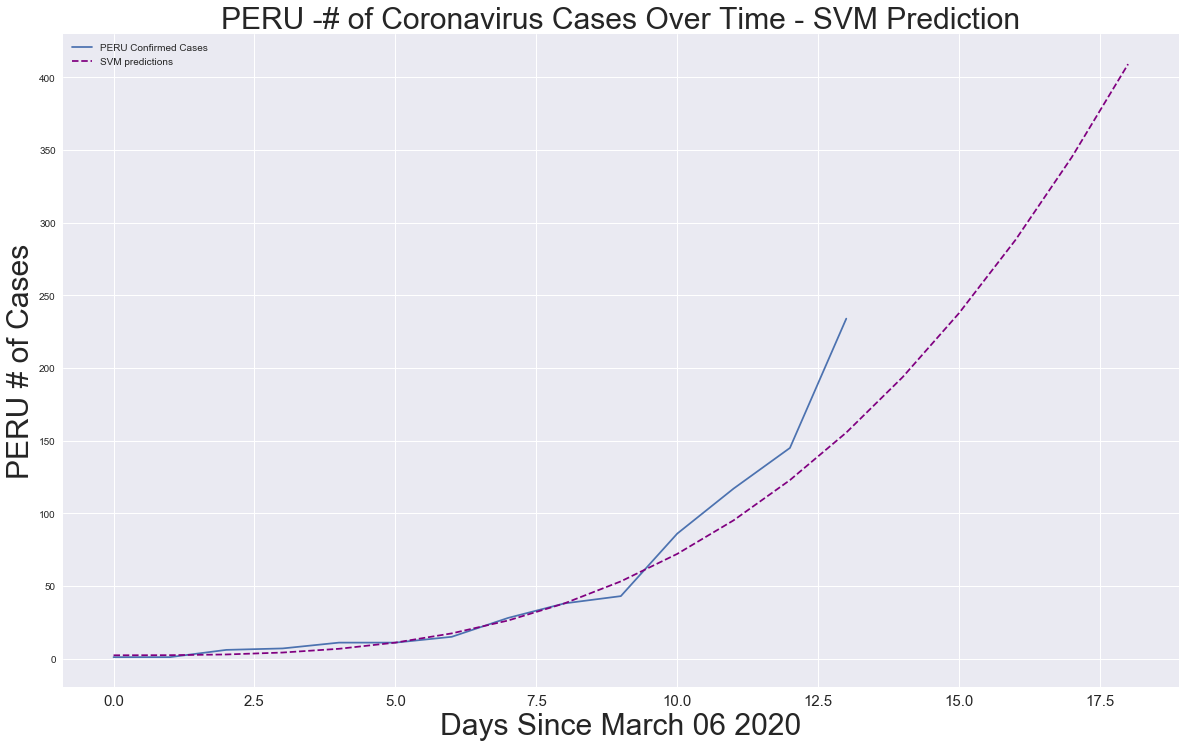

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('PERU -# of Coronavirus Cases Over Time - SVM Prediction', size=30)
plt.xlabel('Days Since March 06 2020', size=30)
plt.ylabel('PERU # of Cases', size=30)
plt.legend(['PERU Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

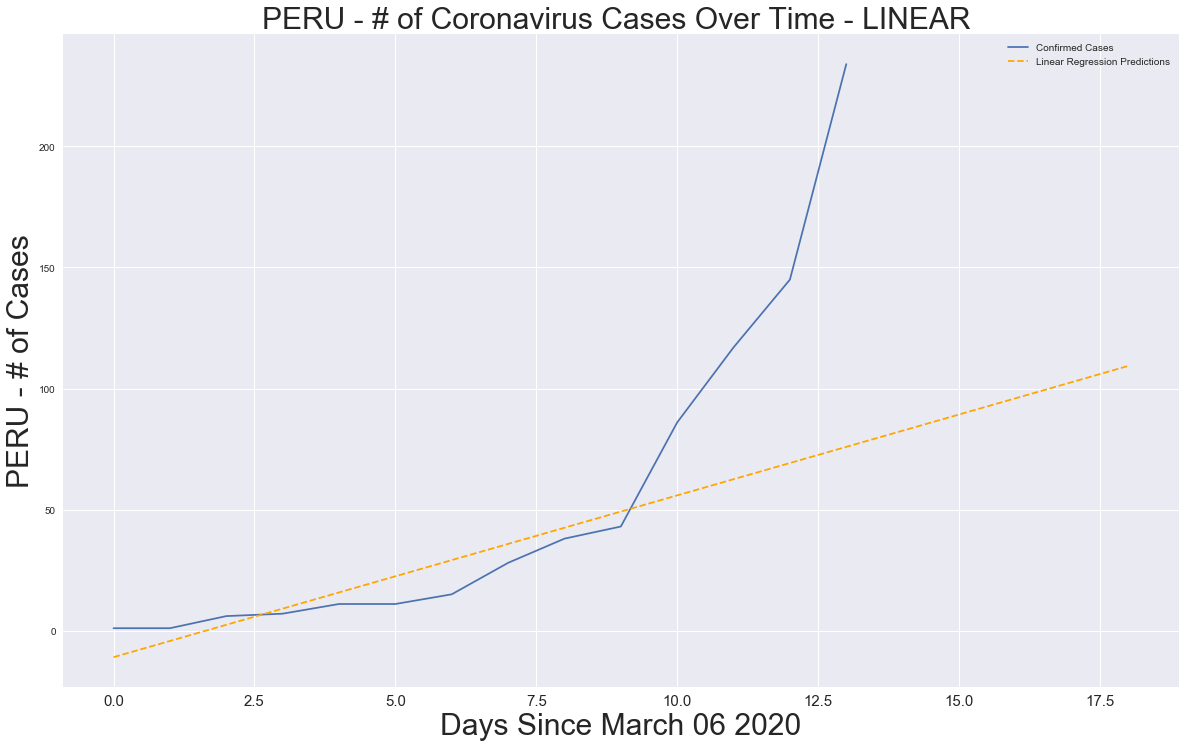

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('PERU - # of Coronavirus Cases Over Time - LINEAR ', size=30)
plt.xlabel('Days Since March 06 2020', size=30)
plt.ylabel('PERU - # of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

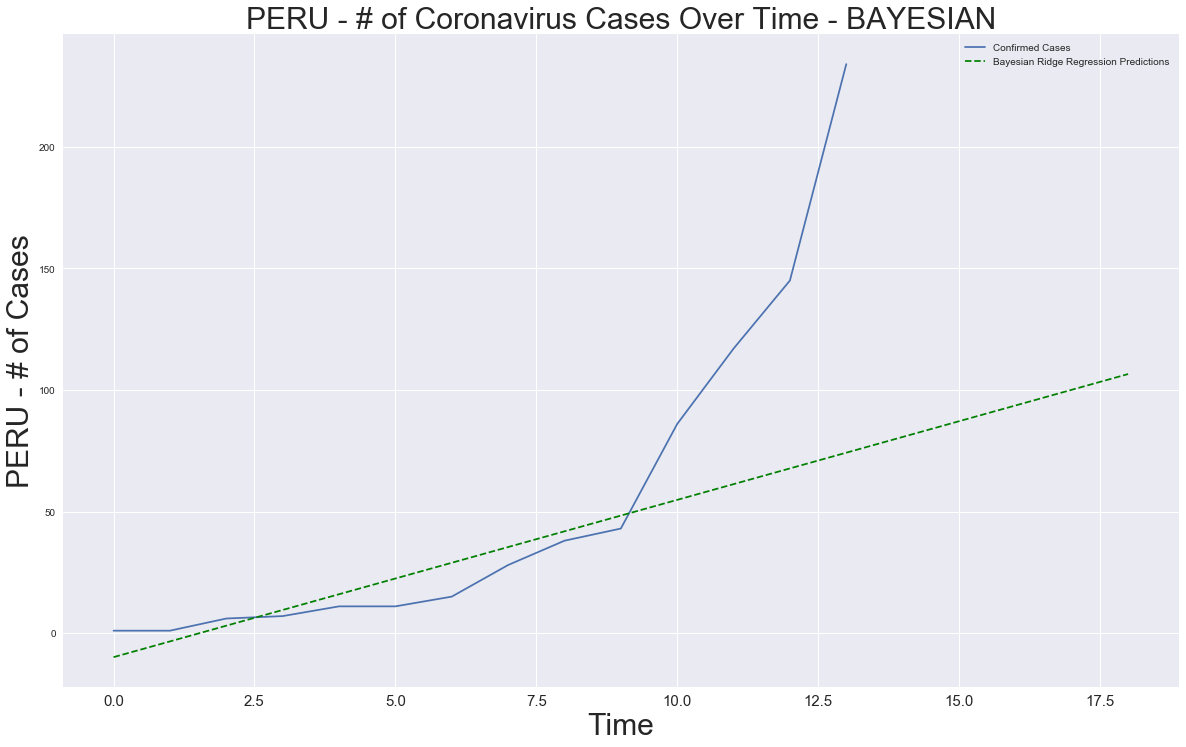

In [28]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(future_forecast, bayesian_pred, linestyle='dashed', color='green')
plt.title('PERU - # of Coronavirus Cases Over Time - BAYESIAN', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('PERU - # of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

Future predictions:

In [29]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forecast_dates[-5:], svm_pred[-5:]))

SVM future predictions:


{('03/20/2020', 193.73092226611217),
 ('03/21/2020', 237.75417613757938),
 ('03/22/2020', 288.05649949942807),
 ('03/23/2020', 345.05649698435235),
 ('03/24/2020', 409.17277322504714)}

In [30]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forecast_dates[-5:], bayesian_pred[-5:]))

Ridge regression future predictions:


{('03/20/2020', 80.66847341786712),
 ('03/21/2020', 87.13668763601396),
 ('03/22/2020', 93.6049018541608),
 ('03/23/2020', 100.07311607230767),
 ('03/24/2020', 106.54133029045451)}

In [31]:
# Future predictions using Linear Regression 
print('Linear regression future predictions:')
print(linear_pred[-5:])

Linear regression future predictions:
[[ 82.59090909]
 [ 89.27272727]
 [ 95.95454545]
 [102.63636364]
 [109.31818182]]


Graphing the number of confirmed cases, deaths, and the mortality rate over time, as well as the number of recoveries

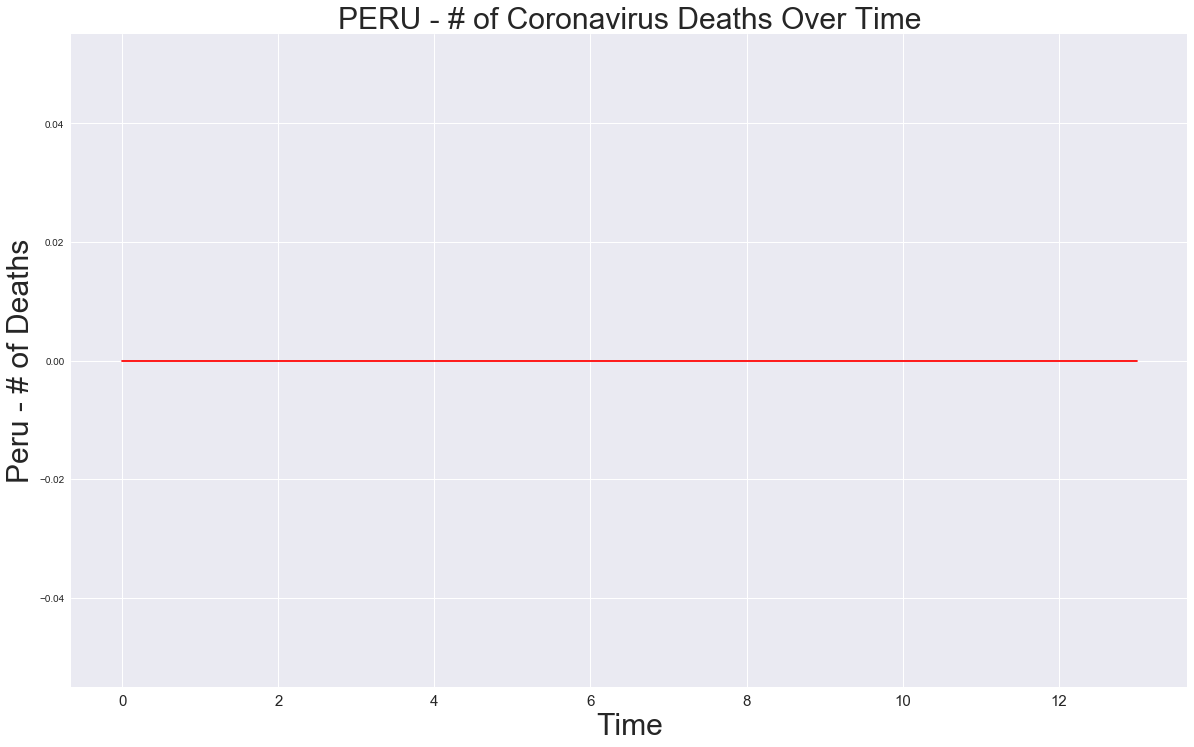

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_total_deaths, color='red')
plt.title('PERU - # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Peru - # of Deaths', size=30)
plt.xticks(size=15)
plt.show()

Mortality

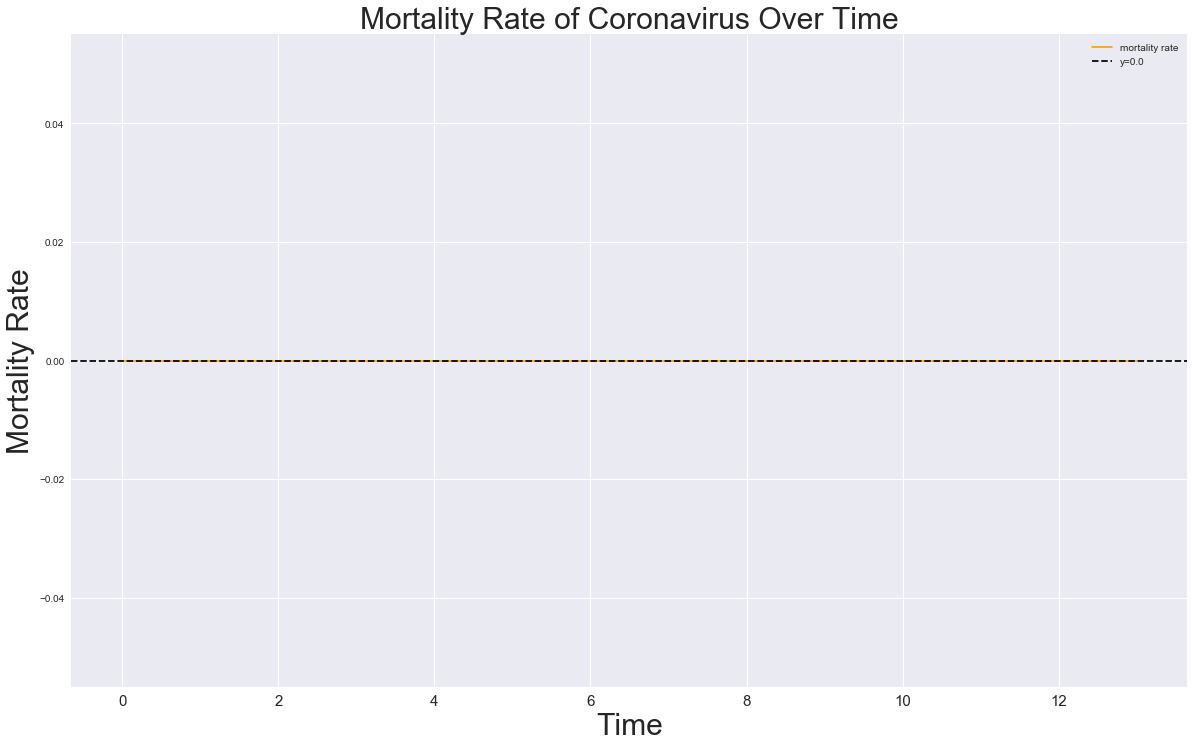

In [33]:
mean_mortality_rate = np.mean(Peru_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

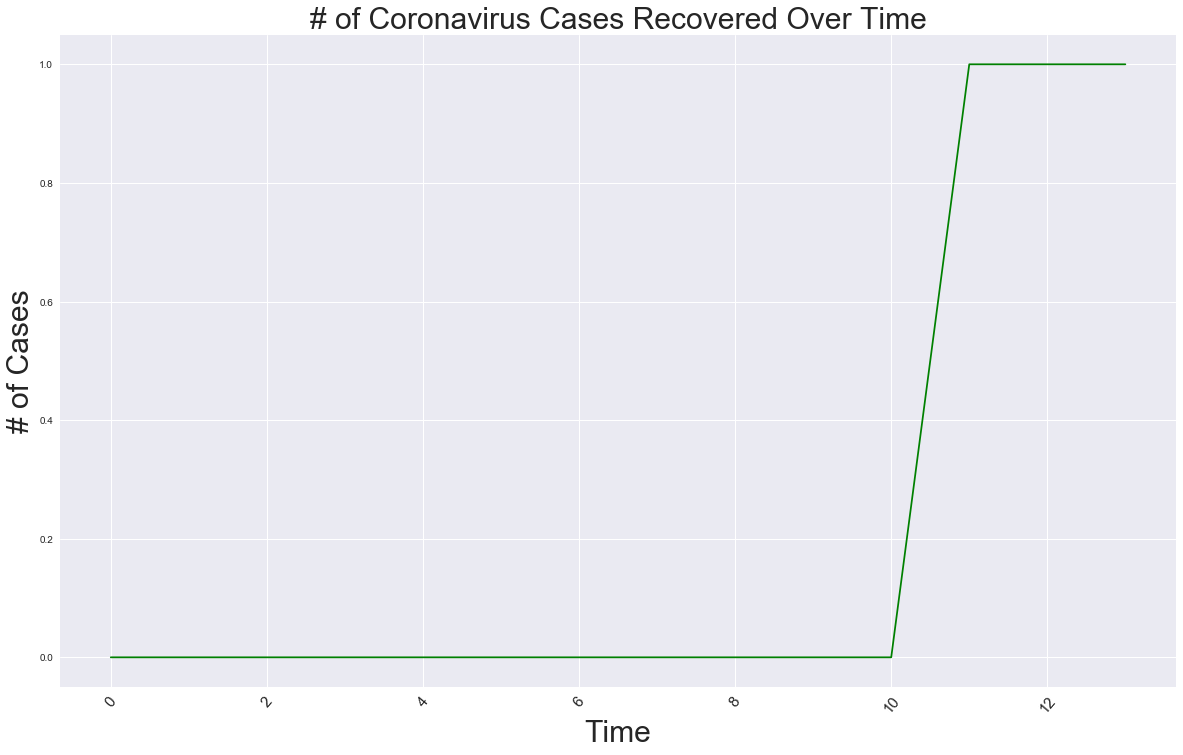

In [34]:
# Recovered over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

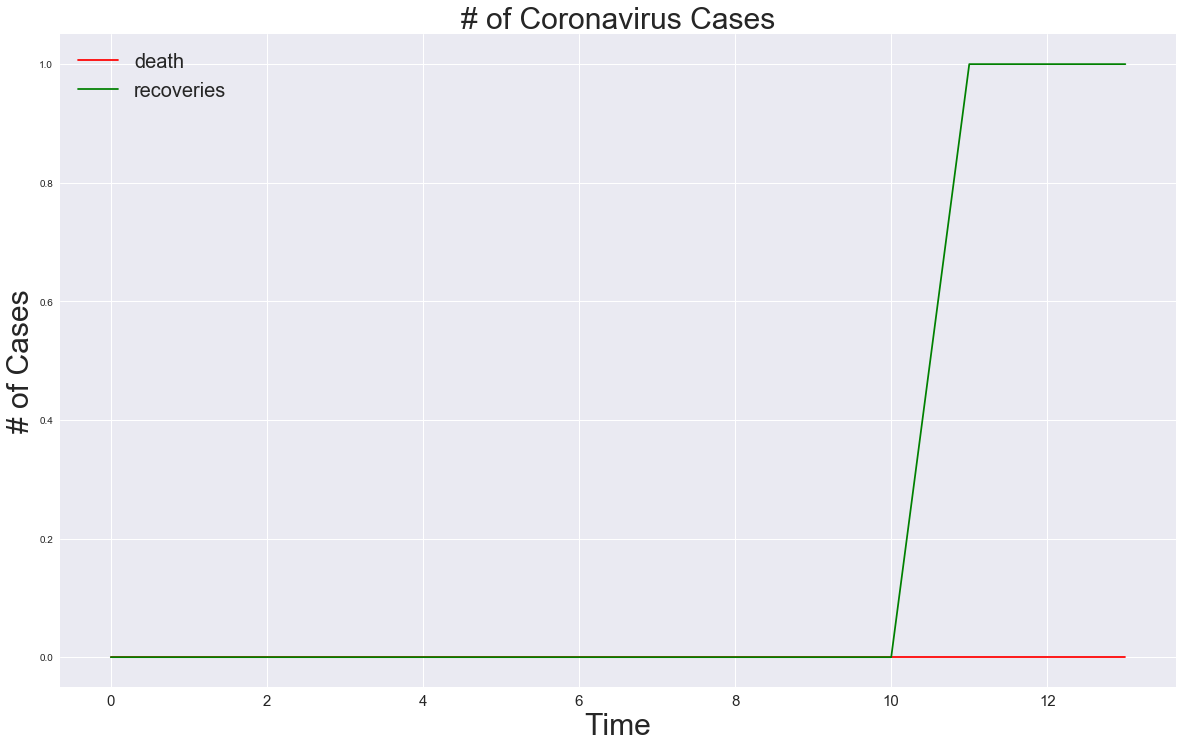

In [35]:
# Deaths vs Recoveries
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_total_deaths, color='r')
plt.plot(adjusted_dates, Peru_total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

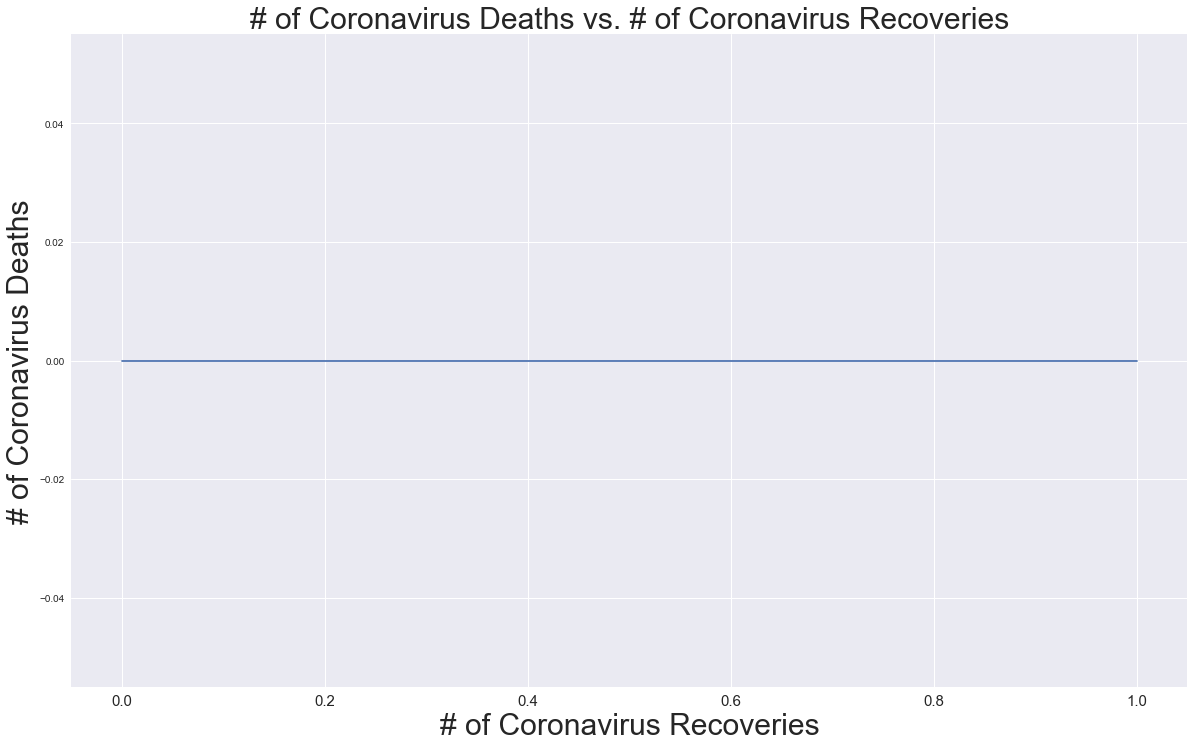

In [36]:
plt.figure(figsize=(20, 12))
plt.plot(Peru_total_recovered, Peru_total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [37]:
# latest info
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

South American Countries

In [38]:
unique_countries =  ['Peru','Brazil','Argentina','Ecuador','Chile','Colombia','Bolivia','Uruguay','Paraguay','Venezuela']

In [39]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [40]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
Brazil: 621 cases
Chile: 238 cases
Peru: 234 cases
Ecuador: 199 cases
Colombia: 102 cases
Argentina: 97 cases
Uruguay: 79 cases
Venezuela: 42 cases
Bolivia: 12 cases
Paraguay: 11 cases


In [41]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

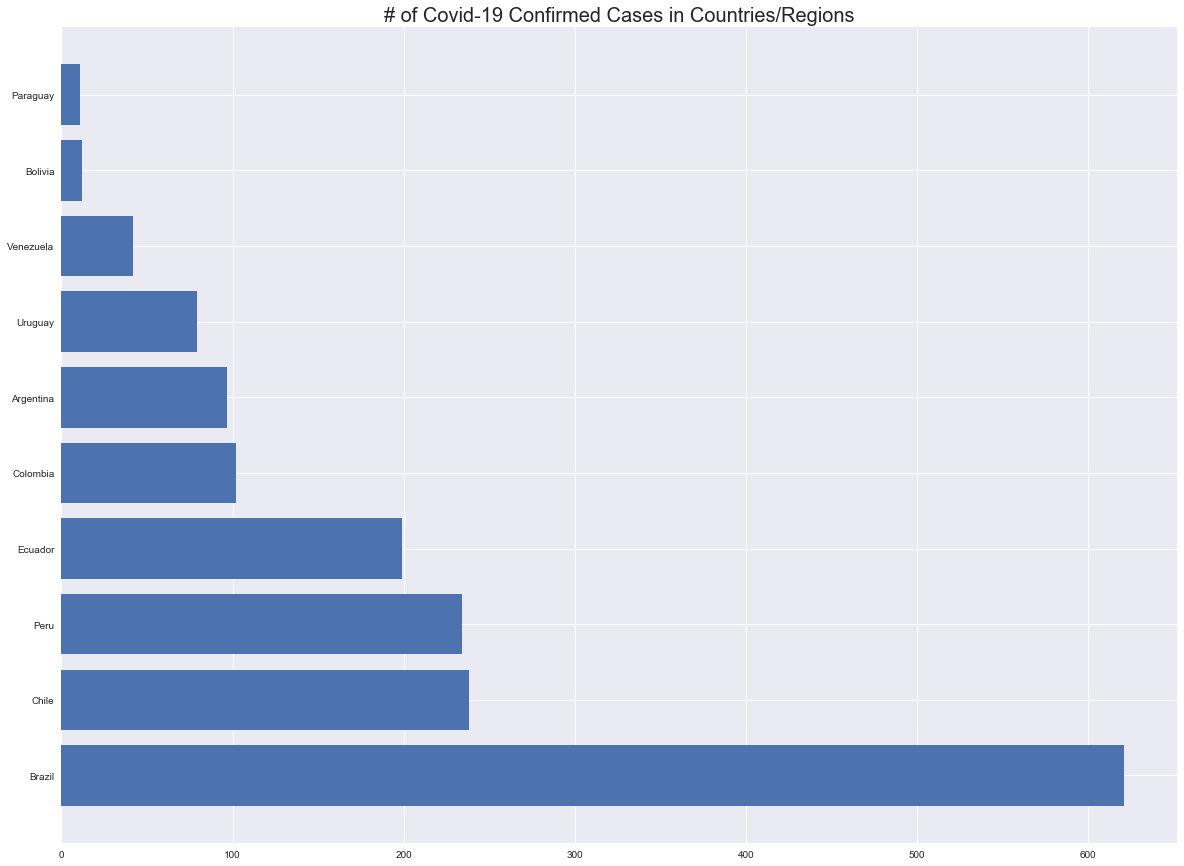

In [50]:
plt.figure(figsize=(20, 15))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in South America', size=20)
plt.show()

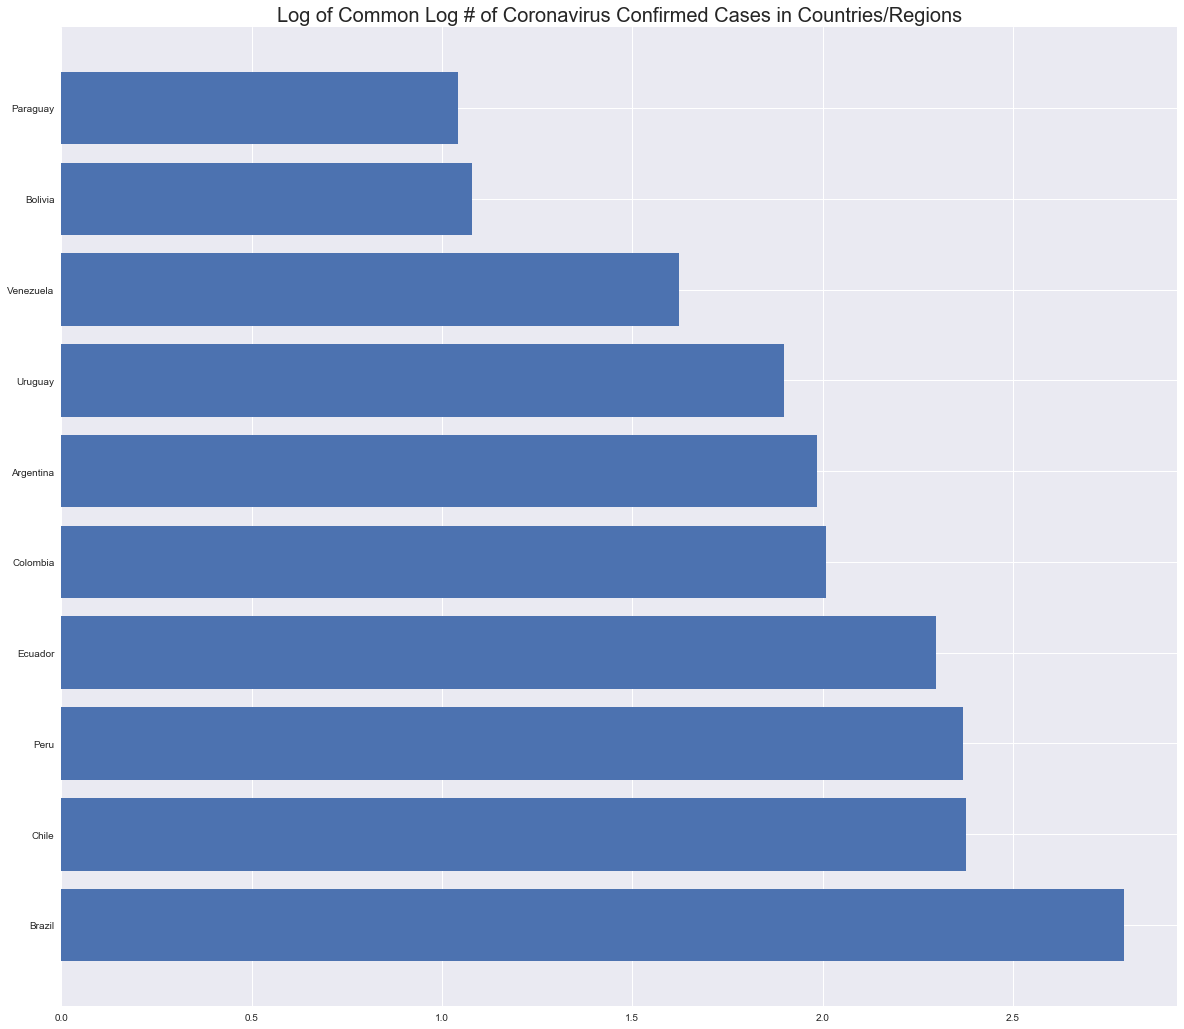

In [51]:
# lets look at it in a logarithmic scale 
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plt.figure(figsize=(20, 18))
plt.barh(visual_unique_countries, log_country_confirmed_cases)
plt.title('Log of Common Log # of Coronavirus Confirmed Cases in South America', size=20)
plt.show()

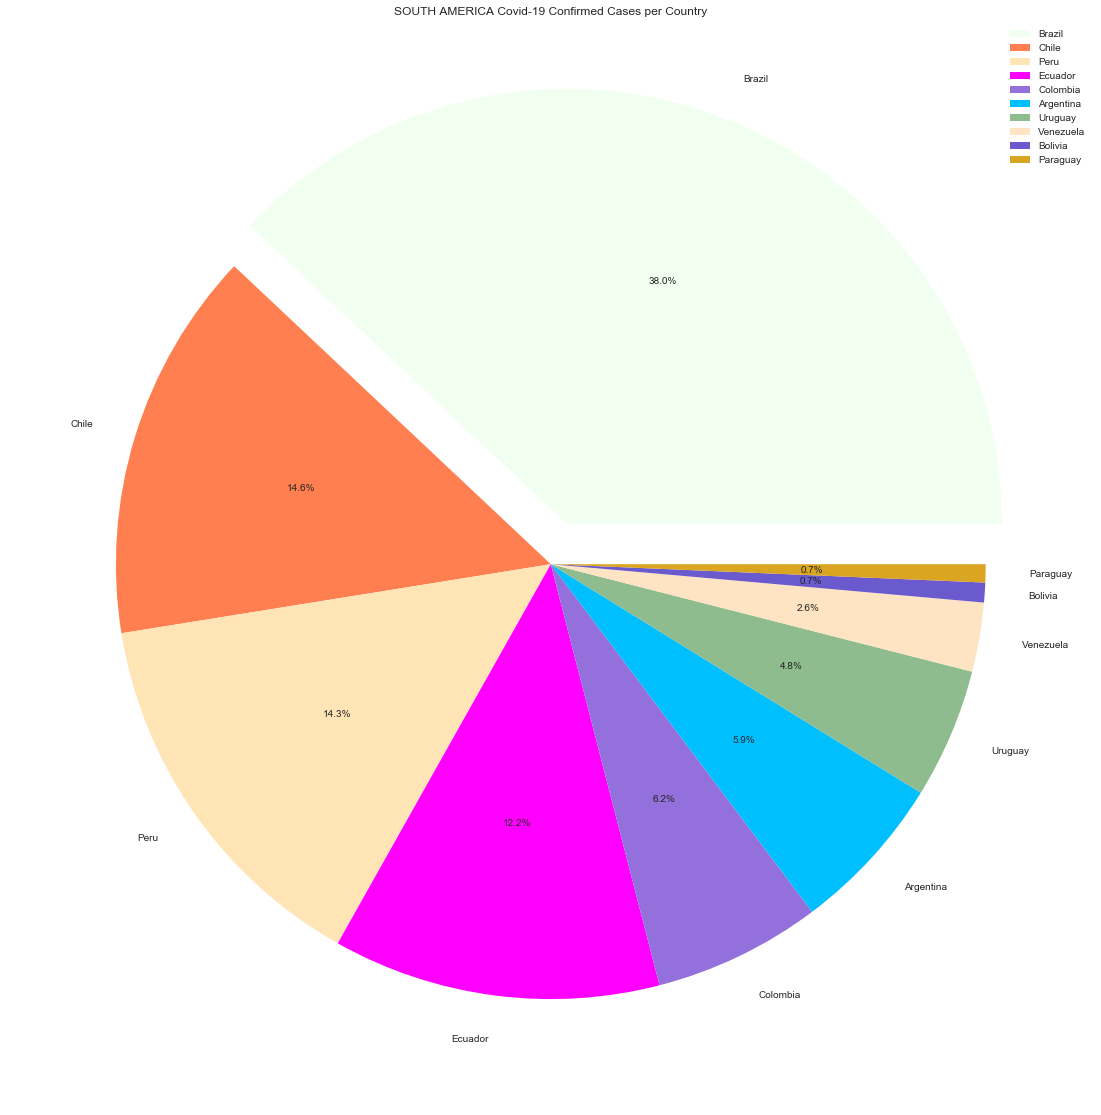

In [44]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('SOUTH AMERICA Covid-19 Confirmed Cases per Country')
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(visual_confirmed_cases, colors=c, explode=explode, autopct='%1.1f%%', labels=visual_unique_countries)
plt.legend(visual_unique_countries, loc='best')
plt.show()

# SIR MODEL 

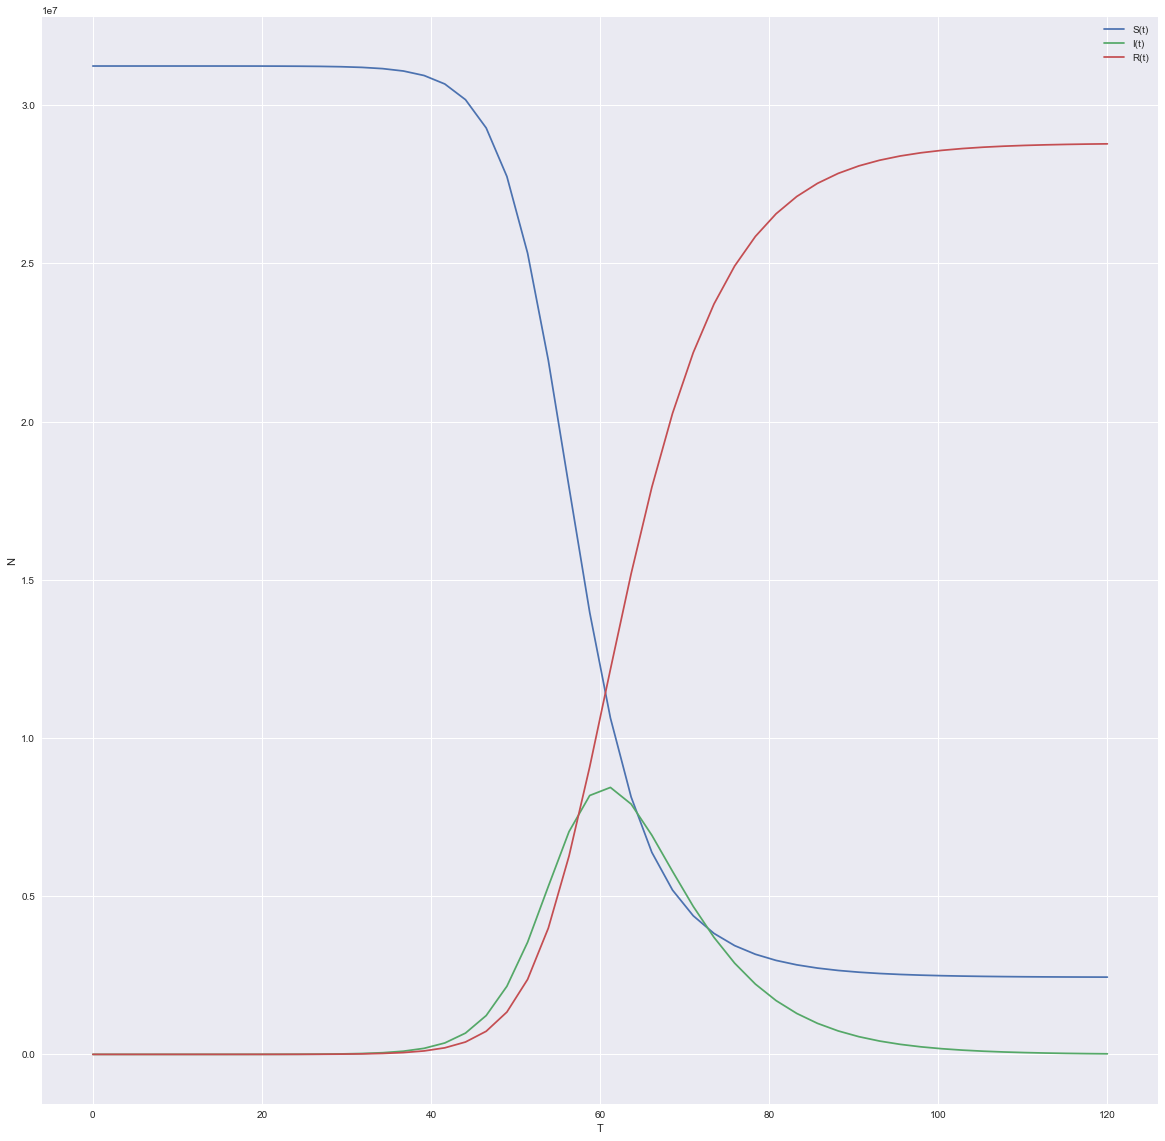

In [45]:
import matplotlib.pylab as plt
from scipy.integrate import odeint
import numpy as np

N = 31237385
I = 6
S = N -I
R = 0

beta = 0.415 # infection rate
gamma = 0.15 # recovery rate

# differential equatinons
def diff(sir, t):
    # sir[0] - S, sir[1] - I, sir[2] - R
    dsdt = - (beta * sir[0] * sir[1])/N
    didt = (beta * sir[0] * sir[1])/N - gamma * sir[1]
    drdt = gamma * sir[1]
    # print (dsdt + didt + drdt)
    dsirdt = [dsdt, didt, drdt]
    return dsirdt


# initial conditions
sir0 = (S, I, R)

# time points ( 60 days)
t = np.linspace(0, 120)

# solve ODE
# the parameters are, the equations, initial conditions, 
# and time steps (between 0 and 100)
sir = odeint(diff, sir0, t)

plt.figure(figsize=(20,20))

plt.plot(t, sir[:, 0], label='S(t)')
plt.plot(t, sir[:, 1], label='I(t)')
plt.plot(t, sir[:, 2], label='R(t)')

plt.legend()

plt.xlabel('T')
plt.ylabel('N')

# use scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()

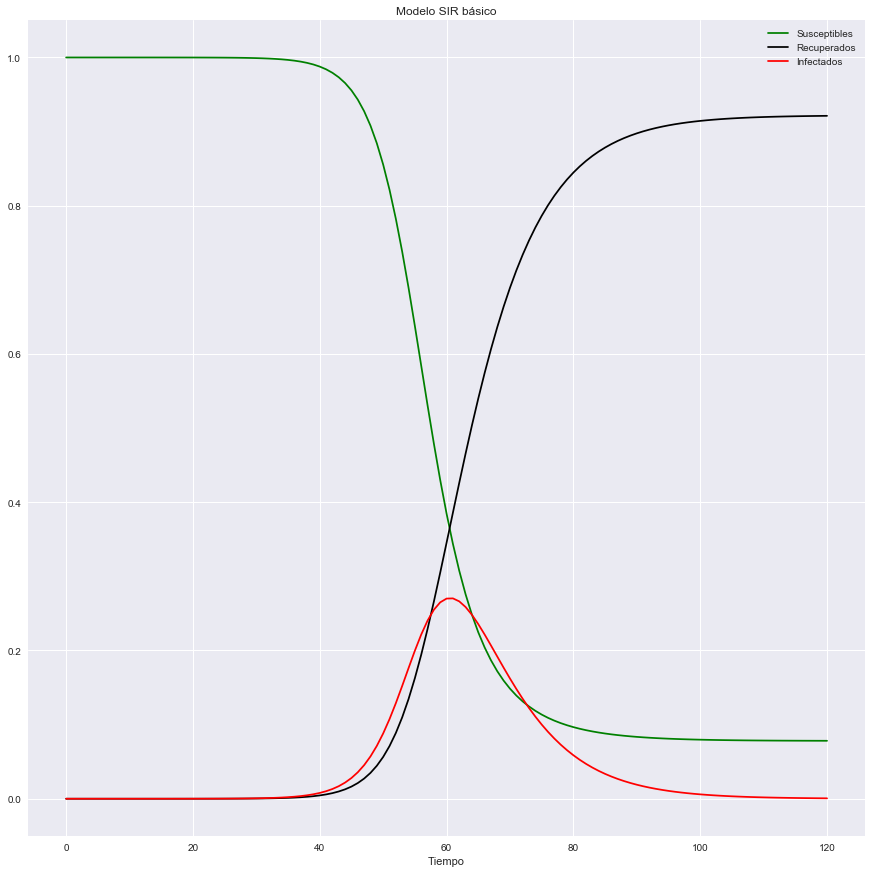

In [46]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
'''tamaño poblacional'''
N=1
beta=0.415  # previo analisis SIR matematico
gamma=0.15  # previo analisis SIR matematico
'''time step'''
TS=1.0 
ND=120.0
I0=1.91e-7 # Asumiendo 6 infectados inicialmente
S0=N-I0

INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
    Y=np.zeros((3))
    V = INP
    '''Las ecuaciones diferenciales'''
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Gráfica
plt.figure(figsize=(15,15))
pl.plot(RES[:,0]*N, '-g', label='Susceptibles')
pl.plot(RES[:,2]*N, '-k', label='Recuperados')
pl.plot(RES[:,1]*N, '-r', label='Infectados')
pl.legend(loc=0)
pl.title('Modelo SIR básico')
pl.xlabel('Tiempo')
pl.savefig('sirpy')

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]]
[[  1]
 [  1]
 [  6]
 [  7]
 [ 11]
 [ 11]
 [ 15]
 [ 28]
 [ 38]
 [ 43]
 [ 86]
 [117]
 [145]
 [234]]
[ 19.1         24.95815392  32.59546313  42.55643616  55.59586128
  73.09285751  95.48890544 124.99503198 163.16085004 213.73842946
 278.88646468 364.07068764 475.71018907 620.86898805]


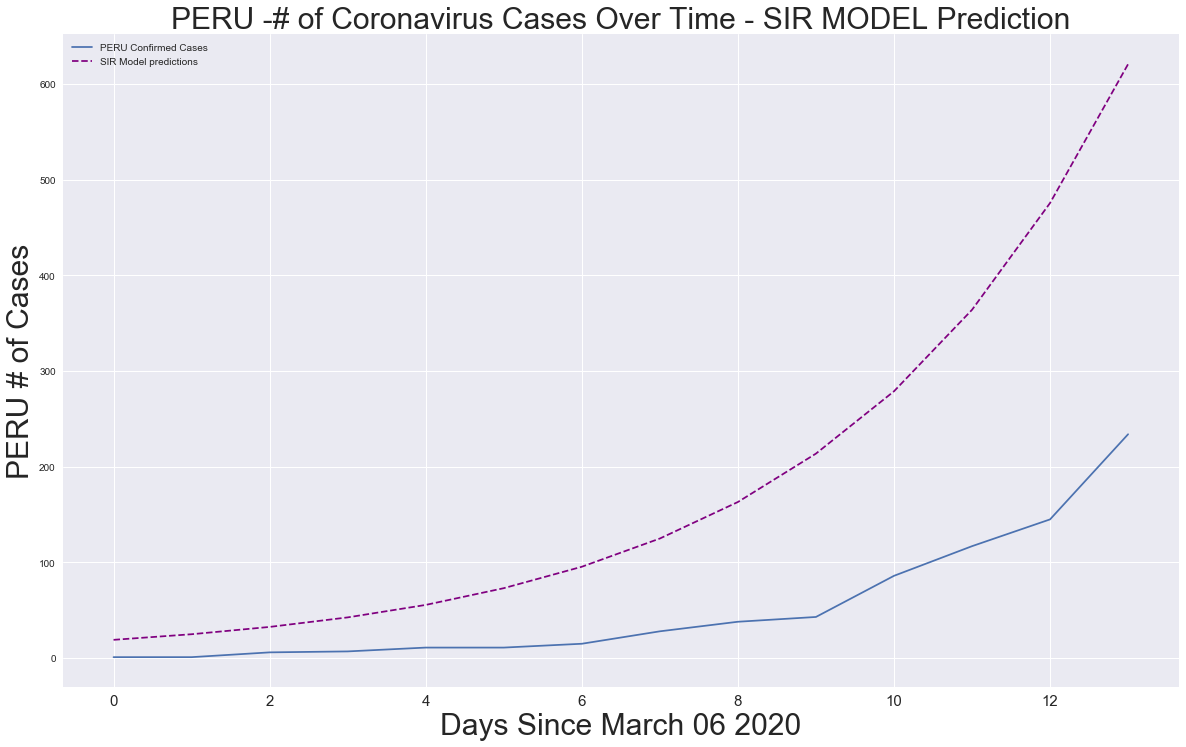

In [47]:
infectados_sir = RES[:,1]*10e7

print(adjusted_dates)
print(Peru_cases)
print(infectados_sir[:len(adjusted_dates)])


#df2 = pd.DataFrame.from_dict({"Day since March06":adjusted_dates,"Real_Infected":Peru_cases},orient = 'index')
#df2['Days']  = adjusted_dates
#df2['Real_Infected']  = Peru_cases
#df2['SIR_infected']  = infectados_sir[:len(Peru_cases)]
                                    
                                      
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(adjusted_dates, infectados_sir[:len(Peru_cases)], linestyle='dashed', color='purple')
#plt.plot(future_forecast, infectados_sir[:18], linestyle='dashed', color='purple')
plt.title('PERU -# of Coronavirus Cases Over Time - SIR MODEL Prediction', size=30)
plt.xlabel('Days Since March 06 2020', size=30)
plt.ylabel('PERU # of Cases', size=30)
plt.legend(['PERU Confirmed Cases', 'SIR Model predictions'])
plt.xticks(size=15)
plt.show()